# Time series
- make time series plots of daily station data

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration
import seaborn as sns
import scipy.stats # to calculate correlation

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR
# import obs_functions as funcO

In [3]:
# define path where obs data is stored
path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'

In [4]:
# open daily T data from 5 stations 
daily_T = xr.open_dataset(f'{path}Daily_T_Aus_5S.nc')
daily_T

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide' 'Cape_Otway' ... 'Melbourne' 'Sydney'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

In [5]:
# select out dates around Krakatoa
K_daily_T = daily_T.sel(time=slice('1878','1888'))

In [6]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

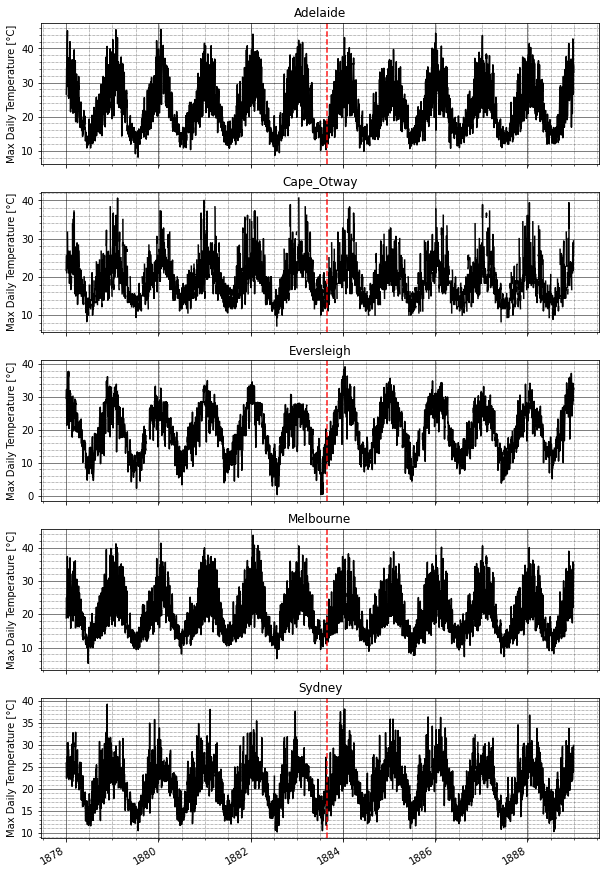

In [7]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_daily_T.station):
        fplot.timeseries_graph(K_daily_T.Tmax.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Max Daily Temperature [{deg}C]', title = s.data) 

#fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('O_timeseries_daily_Tmax_stacked.png', dpi=300, bbox_inches='tight')

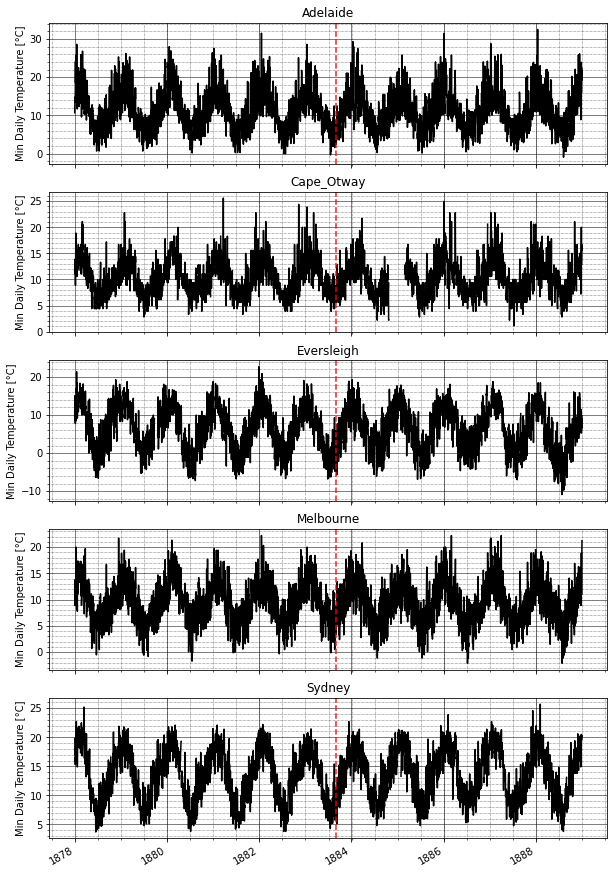

In [9]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(10,15)) # make a figure

with dask.diagnostics.ProgressBar():
    for i, s in enumerate(K_daily_T.station):
        fplot.timeseries_graph(K_daily_T.Tmin.sel(station=s), ax = axes[i])
        axes[i].set(ylabel= f'Min Daily Temperature [{deg}C]', title = s.data) 

#fig.suptitle('Time series of temperature anomalies', size=16)

#fig.tight_layout() # makes titles overlap, but is meant to stops things from overlapping and makes the figure more compact

plt.savefig('O_timeseries_daily_Tmin_stacked.png', dpi=300, bbox_inches='tight')